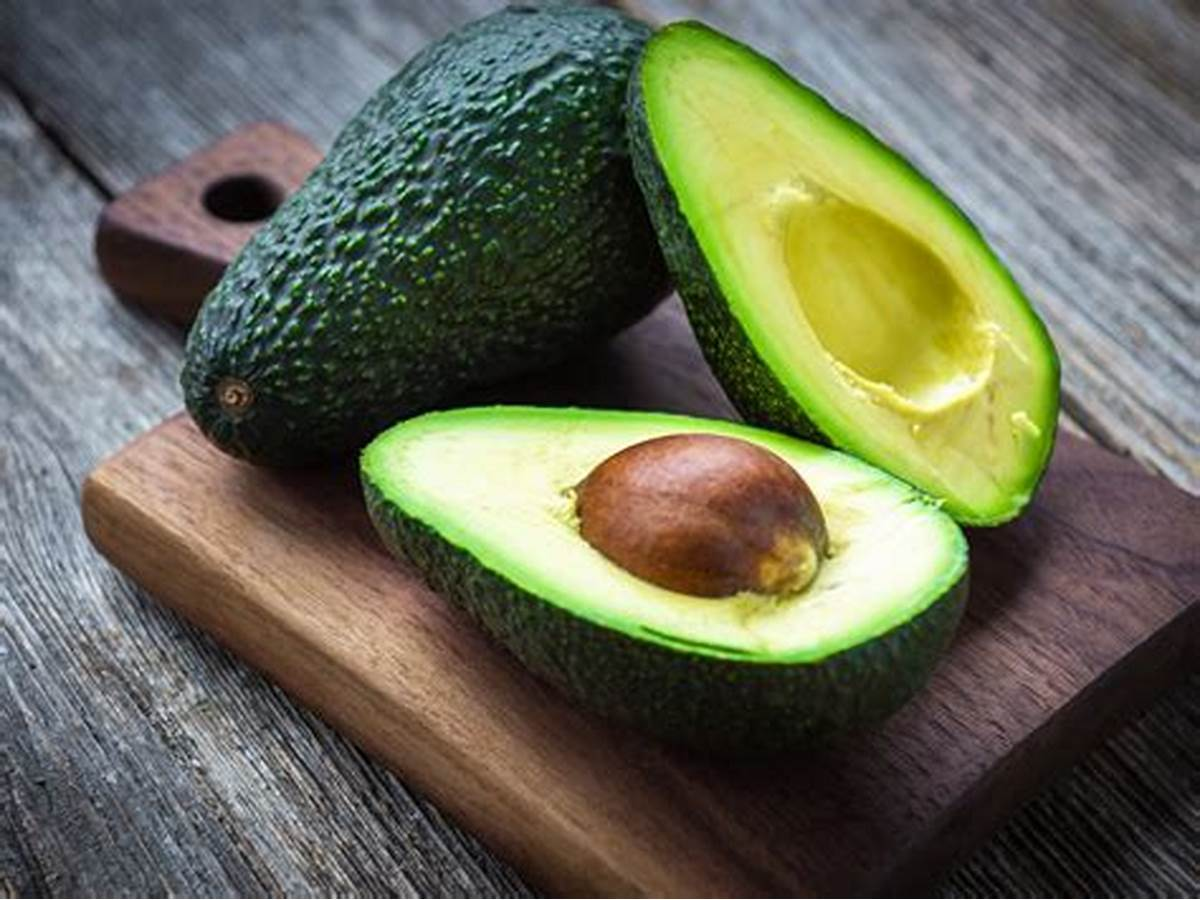

### Avacado Project
##### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'Avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


- Unnamed column seems to be no use so dropping the column

#### Sampling  the - Above  Dataset as  it has  huge Rows  count

In [3]:
# generating one row 
rows = df.sample(frac =.25)
  
# checking if sample is 0.25 times data or not
  
if (0.25*(len(df))== len(rows)):
    print( "Frame")
    print(len(df), len(rows))
  

In [4]:
df.columns.value_counts().sum()

14

so we  have  total  13  columns  in the Dataset

In [5]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5882,1,2017-12-24,1.28,127375.45,7430.89,72517.20,27.00,47400.36,43236.49,4163.87,0.0,conventional,2017,BuffaloRochester
15597,8,2017-11-05,1.61,18723.45,256.08,154.47,5.48,18307.42,18300.82,6.60,0.0,organic,2017,HarrisburgScranton
14302,29,2016-06-05,1.10,117920.36,36488.57,7670.66,417.29,73343.84,59332.91,14010.93,0.0,organic,2016,SouthCentral
15336,12,2017-10-08,1.73,19807.92,5943.03,470.54,0.00,13394.35,13391.02,3.33,0.0,organic,2017,DallasFtWorth
16276,51,2017-01-08,2.15,42755.80,6642.33,18205.31,338.50,17569.66,17103.64,466.02,0.0,organic,2017,NewYork


so we  have  generated  the 25%  Sample of the above  data which  can be used  for  further Analysis 

In [6]:
rows.shape

(4562, 14)

#### Checking  for  the Null values in the Dataset

In [7]:
rows.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Checking  with  the Heatmap

<AxesSubplot:>

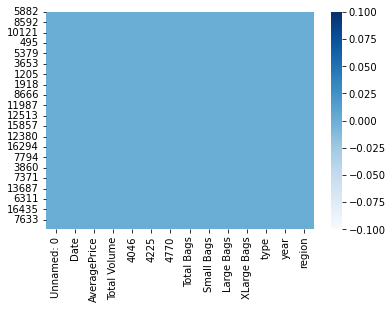

In [8]:
sns.heatmap(rows.isna(), cmap='Blues')

So we  have  no null values  in these  dataset

#### Statistical information

In [9]:
rows.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,4562.000000,4562.000000,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4562.000000,4562.000000
mean,24.275975,1.390986,8.982772e+05,3.124773e+05,3.116166e+05,2.424694e+04,2.499332e+05,1.889080e+05,5.773043e+04,3294.752672,2016.145331
std,15.536475,0.397741,3.593831e+06,1.317912e+06,1.241542e+06,1.158438e+05,1.031381e+06,7.841119e+05,2.517773e+05,19464.724589,0.938196
min,0.000000,0.440000,5.309600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.080000,1.194237e+04,9.861300e+02,3.354495e+03,0.000000e+00,5.782825e+03,3.363515e+03,1.566625e+02,0.000000,2015.000000
50%,24.000000,1.360000,1.134725e+05,9.860800e+03,2.972464e+04,2.150800e+02,4.151962e+04,2.836347e+04,2.909430e+03,0.000000,2016.000000
75%,38.000000,1.650000,4.561982e+05,1.176790e+05,1.555548e+05,6.550032e+03,1.127791e+05,8.533696e+04,2.209778e+04,166.750000,2017.000000
max,52.000000,3.120000,4.340984e+07,1.652980e+07,1.605408e+07,1.896150e+06,1.639452e+07,1.254033e+07,3.789723e+06,551693.650000,2018.000000


so we  can see  that the  dataset has -- high std deviation between  the  data  as  we  have  high  std deviation at  the column in Large  Bags and X large Bags

as  there is also  the  high  chances  that  where  the deviation is  high  there  might  be  the  also  asymetrric or skewed.
 Also we  can see that the  2nd  quartile and  the max value diffrences  are also high  so  there  are  chances of  Outliers 

#### Checking  for  the Datatypes

In [10]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 5882 to 2385
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4562 non-null   int64  
 1   Date          4562 non-null   object 
 2   AveragePrice  4562 non-null   float64
 3   Total Volume  4562 non-null   float64
 4   4046          4562 non-null   float64
 5   4225          4562 non-null   float64
 6   4770          4562 non-null   float64
 7   Total Bags    4562 non-null   float64
 8   Small Bags    4562 non-null   float64
 9   Large Bags    4562 non-null   float64
 10  XLarge Bags   4562 non-null   float64
 11  type          4562 non-null   object 
 12  year          4562 non-null   int64  
 13  region        4562 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 534.6+ KB


- we have 3 categeorical variables in the dataset
    * Date
    * type
    * region

##### About the features in dataset

- Date = The date of the observation
- Averageprice = Average price of single avacado
- Total Volume = Total number of avacados sold
- 4046 = Total number of avacados with PLU-4046 sold
- 4225 = Total number of avacados with PLU-4225 sold
- 4770 = Total number of avacados with PLU-4770 sold

- The goal is to predict the average cost of the avocado which is continuous in nature for different types
- In this dataset most of the columns are float type in nature
- Date,type,region are categeorical in Nature

#### Columns in Dataset

In [11]:
rows.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

##### unique elements in each of the columns

In [12]:
rows.nunique()

Unnamed: 0        53
Date             169
AveragePrice     226
Total Volume    4561
4046            4482
4225            4542
4770            3178
Total Bags      4551
Small Bags      4443
Large Bags      3870
XLarge Bags     1544
type               2
year               4
region            54
dtype: int64

#### Exploration of  the Dataset (EDA)

Univariate Analysis

In [13]:
rows['type'].value_counts()

conventional    2336
organic         2226
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

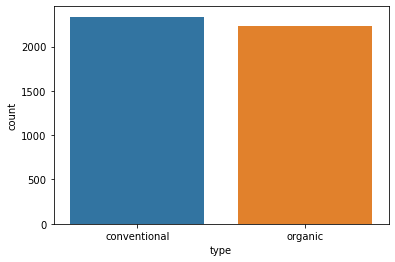

In [14]:
sns.countplot(rows.type)

In [15]:
rows['year'].value_counts()

2017    1448
2015    1411
2016    1390
2018     313
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

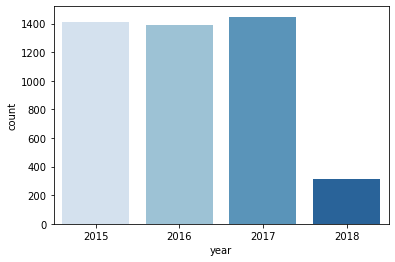

In [16]:
# Visualization of year value counts
sns.countplot(rows.year, palette='Blues')

- In 2018 there is very much less data compared to other years

In [17]:
rows['region'].value_counts()

NewYork                102
Houston                101
SanFrancisco           100
SanDiego                99
Denver                  98
RichmondNorfolk         96
LosAngeles              96
Louisville              96
NewOrleansMobile        95
GreatLakes              95
SouthCentral            94
StLouis                 93
Columbus                91
Orlando                 90
Atlanta                 90
RaleighGreensboro       90
West                    90
GrandRapids             90
Plains                  89
Boise                   89
Nashville               89
Philadelphia            88
LasVegas                87
WestTexNewMexico        87
Sacramento              85
Chicago                 84
Southeast               84
Albany                  84
Detroit                 83
Indianapolis            83
Jacksonville            81
HartfordSpringfield     81
CincinnatiDayton        81
TotalUS                 80
Seattle                 80
Northeast               80
BaltimoreWashington     79
D

<AxesSubplot:xlabel='region'>

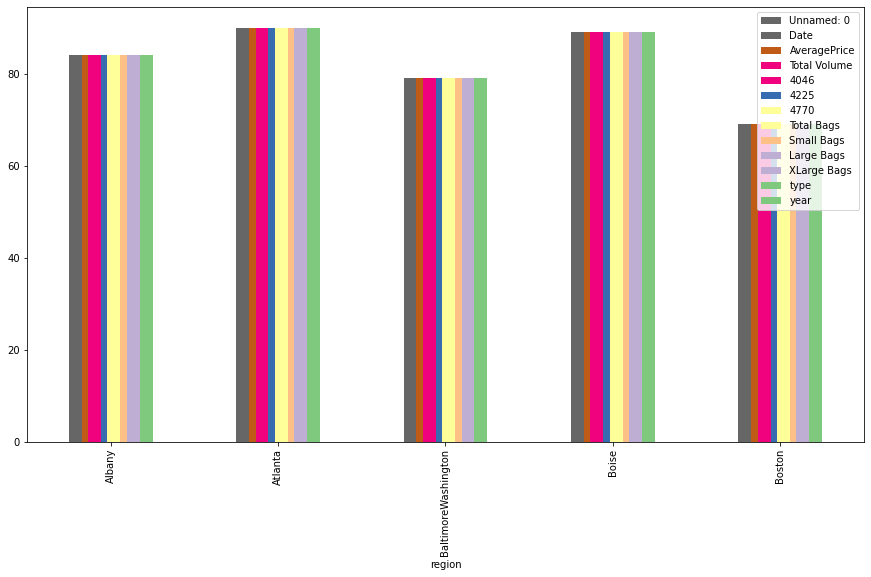

In [18]:
rows.groupby(['region']).count().head().plot(kind='bar', figsize=(15,8),cmap='Accent_r')

#### First 25  regions 

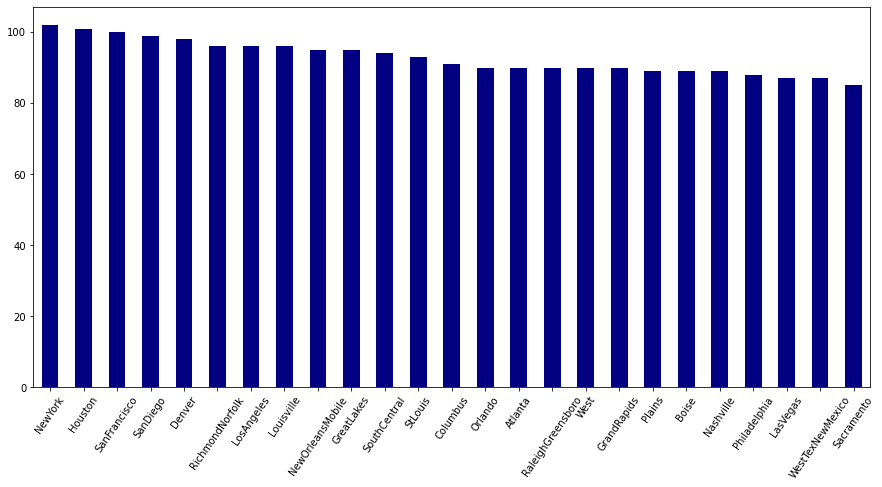

In [19]:
plt.figure(figsize=(15,7))
rows.region.value_counts(ascending = False).head(25).plot(kind = 'bar', color='navy');
plt.xticks(rotation = 55);

In the  first  25  we  can see  that  the Louisville  has  the  highest  region where  avacado  is popular 

#### Left more  regions

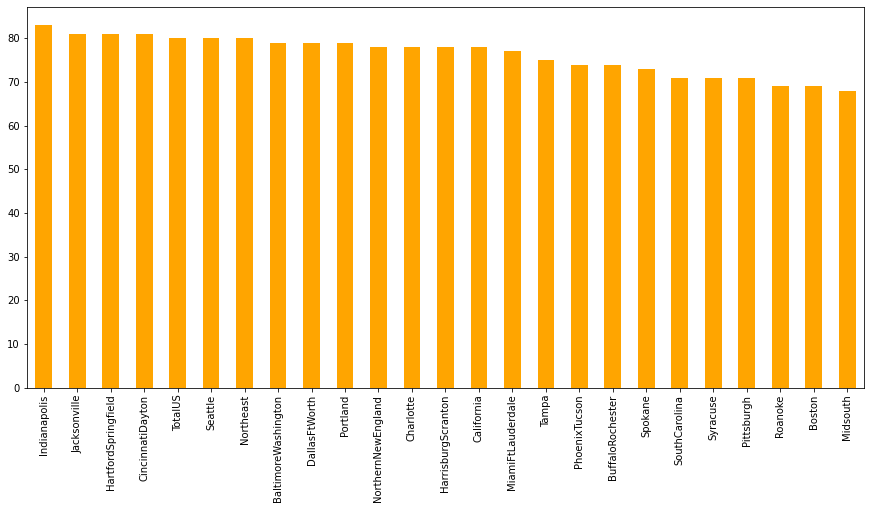

In [20]:
plt.figure(figsize=(15,7))
rows.region.value_counts(ascending = False).tail(25).plot(kind = 'bar', color='orange');
plt.xticks(rotation = 90);

* There is equal amount of data in every column except WestTexNewMexico

- Type has 2 unique values (conventional, organic)
- Year has 4 unique values which are of discrete type(2015,2016,2017,2018)
- region has 54 unique values

In [21]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5882,1,2017-12-24,1.28,127375.45,7430.89,72517.20,27.00,47400.36,43236.49,4163.87,0.0,conventional,2017,BuffaloRochester
15597,8,2017-11-05,1.61,18723.45,256.08,154.47,5.48,18307.42,18300.82,6.60,0.0,organic,2017,HarrisburgScranton
14302,29,2016-06-05,1.10,117920.36,36488.57,7670.66,417.29,73343.84,59332.91,14010.93,0.0,organic,2016,SouthCentral
15336,12,2017-10-08,1.73,19807.92,5943.03,470.54,0.00,13394.35,13391.02,3.33,0.0,organic,2017,DallasFtWorth
16276,51,2017-01-08,2.15,42755.80,6642.33,18205.31,338.50,17569.66,17103.64,466.02,0.0,organic,2017,NewYork


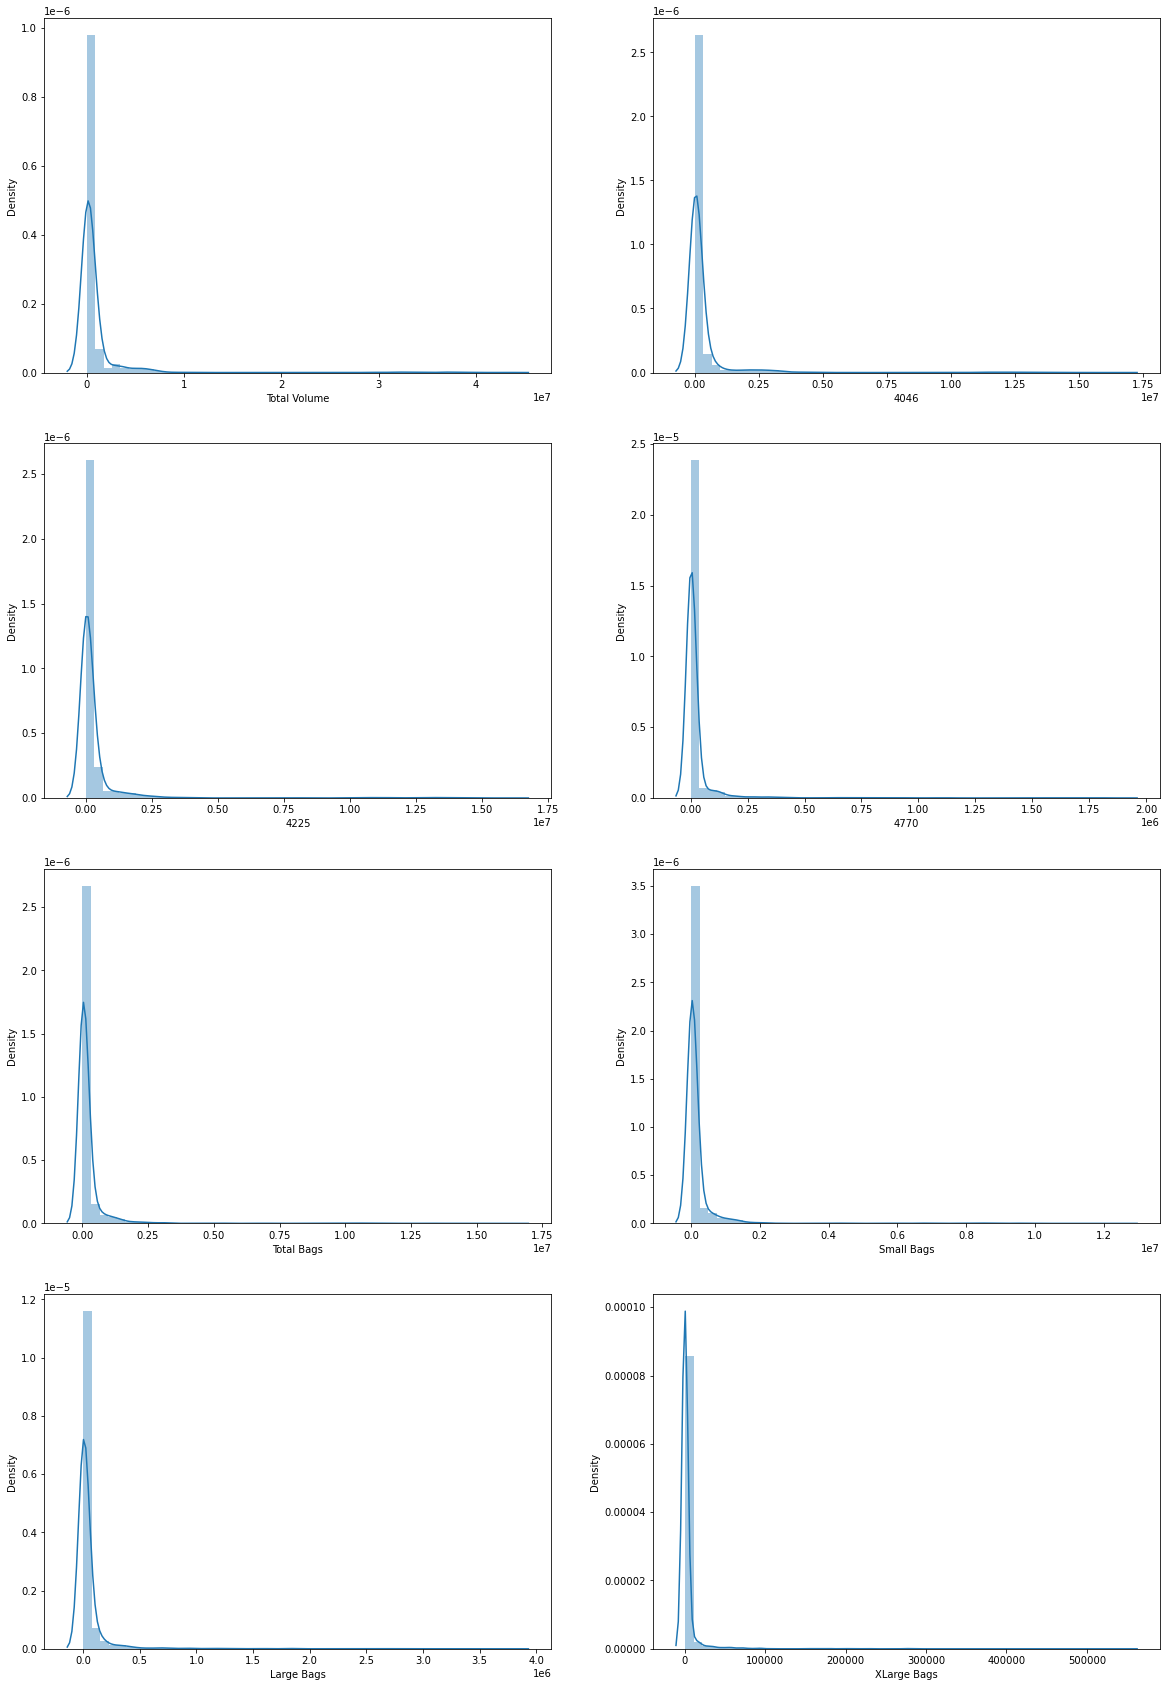

In [22]:
num_cols = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
plt.figure(figsize=(20,30),facecolor='white')
plotnum = 1
for i in num_cols:
    if plotnum <=10:
        plt.subplot(4,2,plotnum)
        sns.distplot(rows[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

- Total Volume,4046,4225,4770 has the binomial distribution.
- Total Bags,Small bags,Large Bags, XLarge Bags has the skewness presentin it.

#### Comparision of year and 4046,4225,4770

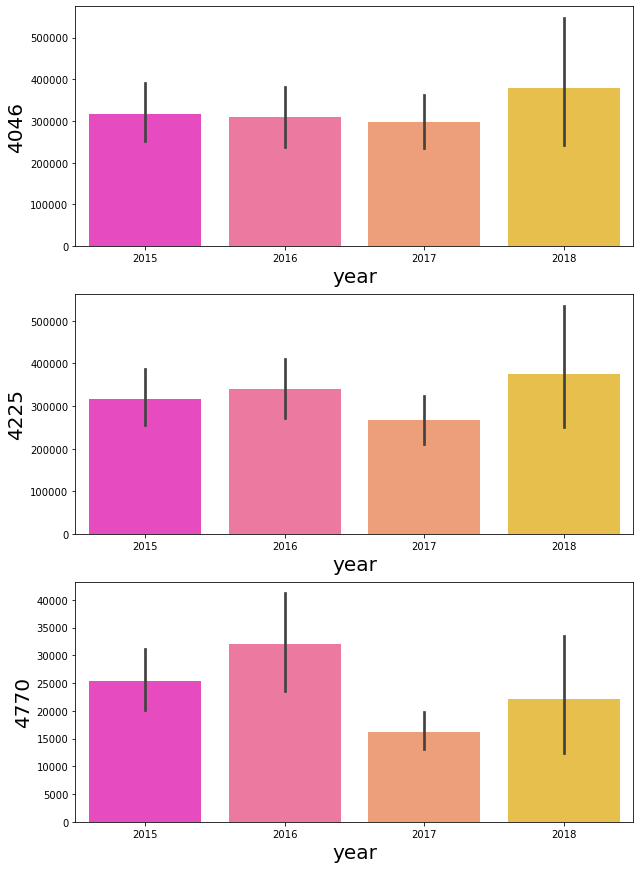

In [23]:
y_cols = rows[['4046','4225','4770']]
x_cols = rows['year']
plt.figure(figsize=(10,15),facecolor='white', edgecolor='b')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='spring')
    plt.xlabel('year',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

- PLU 4046 has grown over the 4 years
- compared to PLU-4225 production PLU-4046 is more
- PLU-4770 is least produced

#### Comparision of different PLU's and type

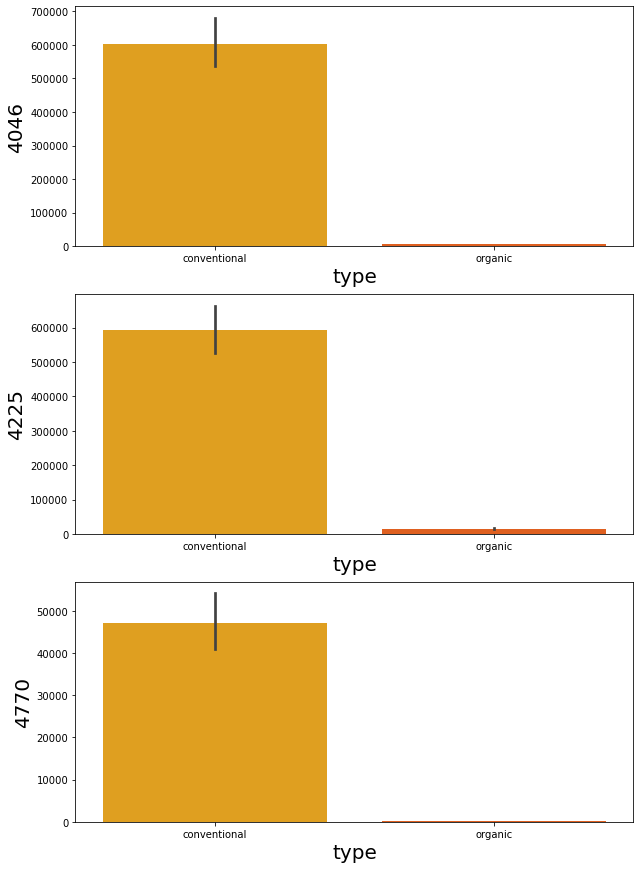

In [24]:
y_cols = rows[['4046','4225','4770']]
x_cols = rows['type']
plt.figure(figsize=(10,15),facecolor='white')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='autumn_r')
    plt.xlabel('type',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

- Production of conventional_type is more in cases 4046,4225,4770.
- By this we can say less production high demand the organic rates we can assume as higher

#### Comparision of avaerage prices in different years

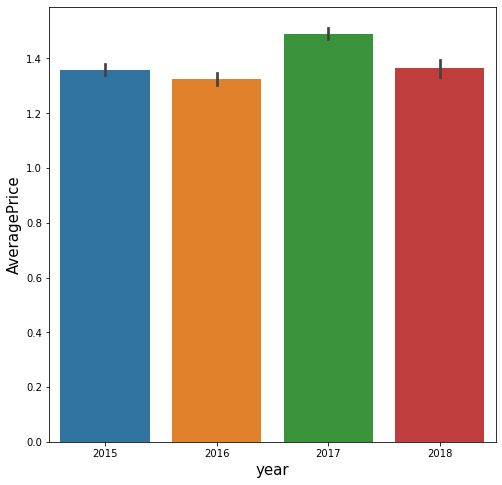

In [25]:
y_cols = rows['AveragePrice']
x_cols = rows[['year']]
plt.figure(figsize=(8,8),facecolor='white')
plotnum = 1
for cols in x_cols:
    plt.subplot(1,1,plotnum)
    sns.barplot(x_cols[cols],y_cols)
    plt.xlabel(cols,fontsize=15)
    plt.ylabel('AveragePrice',fontsize=15)
    plotnum+=1
plt.show()

- From this graph we can say that there is more avarage price in 2017 years

<AxesSubplot:xlabel='year'>

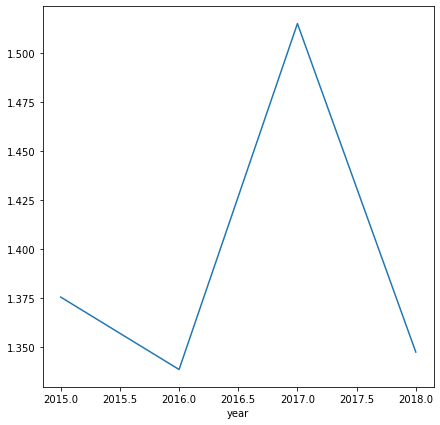

In [26]:
plt.figure(figsize=(7,7))
df.groupby('year')['AveragePrice'].mean().plot(kind='line')

- There is some dip in AveragePrice in 2016 and hike in AveragePrice in 2017

In [27]:
# Values of the year and average price
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [28]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

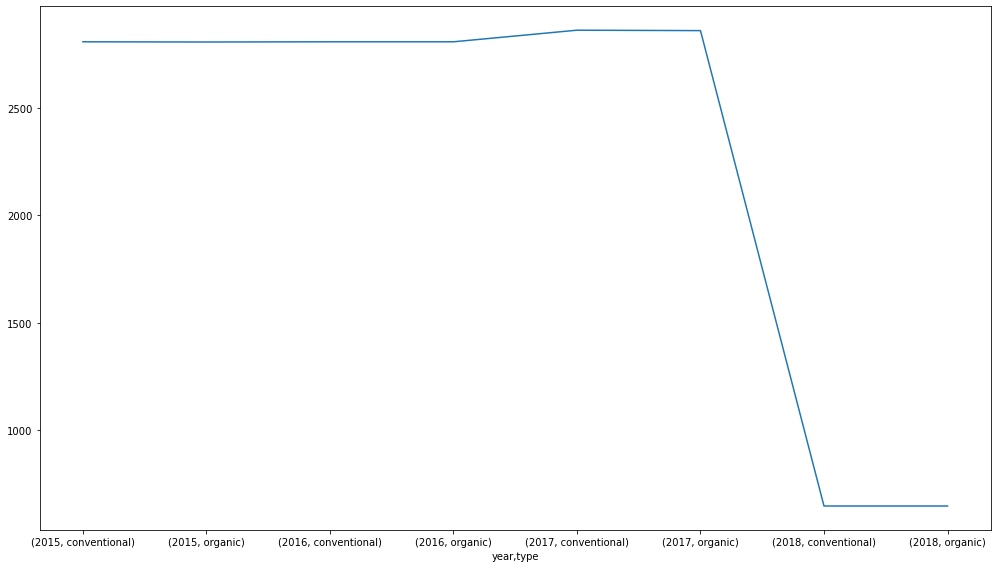

In [29]:
plt.figure(figsize=(14,8))
df.groupby('year')['type'].value_counts().plot()
plt.tight_layout()

- 2018 there is less production in convetional and organic types 

#### extracting Date and month from Date feature not creating year because it is already present in dataset

In [30]:
rows['Date'] = pd.to_datetime(rows['Date'])     # changing the object type to datetime type
rows['Day'] = rows['Date'].apply(lambda d:d.day)# Extracting the date and adding to df
rows['Month'] = rows['Date'].apply(lambda m:m.month)#Extracting month and adding to df

In [31]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
5882,1,2017-12-24,1.28,127375.45,7430.89,72517.20,27.00,47400.36,43236.49,4163.87,0.0,conventional,2017,BuffaloRochester,24,12
15597,8,2017-11-05,1.61,18723.45,256.08,154.47,5.48,18307.42,18300.82,6.60,0.0,organic,2017,HarrisburgScranton,5,11
14302,29,2016-06-05,1.10,117920.36,36488.57,7670.66,417.29,73343.84,59332.91,14010.93,0.0,organic,2016,SouthCentral,5,6
15336,12,2017-10-08,1.73,19807.92,5943.03,470.54,0.00,13394.35,13391.02,3.33,0.0,organic,2017,DallasFtWorth,8,10
16276,51,2017-01-08,2.15,42755.80,6642.33,18205.31,338.50,17569.66,17103.64,466.02,0.0,organic,2017,NewYork,8,1


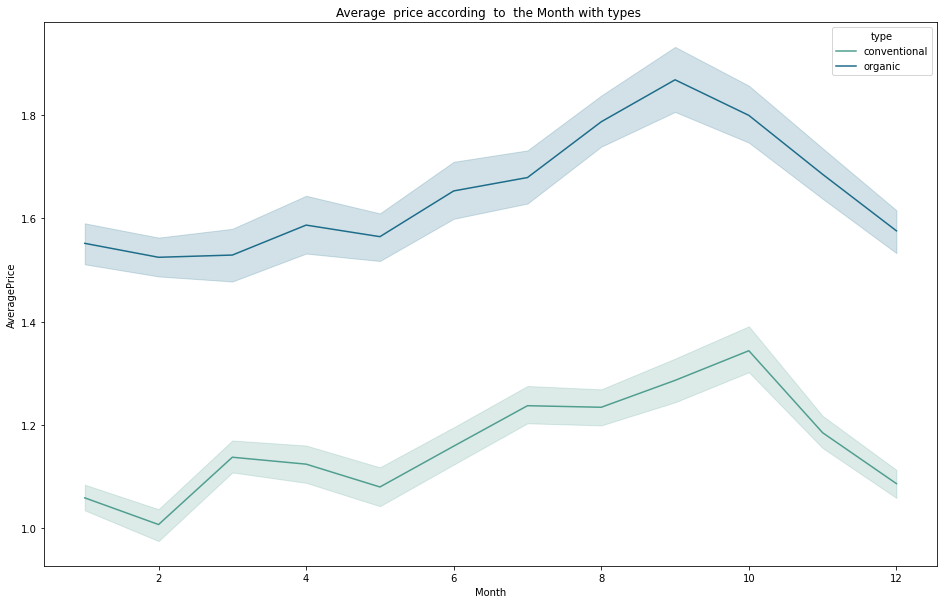

In [32]:
plt.figure(figsize=(16,10),facecolor='white')
sns.lineplot(x='Month',y='AveragePrice', hue = 'type',data=rows, palette='crest')
plt.title('Average  price according  to  the Month with types ')
plt.show()

- There is hike in 8-10 th month for both organic and conventional types

#### Dropping some of the columns
###### Observation:
- As we observe the sum of 4046,4225,4770,Total Bags is Total Volume Column
- The sum of Small Bags,Large Bags,XLarge Bags is Total Bags feature


In [33]:
rows.drop(columns=['Date','Total Volume','Total Bags'],inplace=True,axis=1)
rows.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
5882,1,1.28,7430.89,72517.20,27.00,43236.49,4163.87,0.0,conventional,2017,BuffaloRochester,24,12
15597,8,1.61,256.08,154.47,5.48,18300.82,6.60,0.0,organic,2017,HarrisburgScranton,5,11
14302,29,1.10,36488.57,7670.66,417.29,59332.91,14010.93,0.0,organic,2016,SouthCentral,5,6
15336,12,1.73,5943.03,470.54,0.00,13391.02,3.33,0.0,organic,2017,DallasFtWorth,8,10
16276,51,2.15,6642.33,18205.31,338.50,17103.64,466.02,0.0,organic,2017,NewYork,8,1


In [34]:
rows.columns.value_counts().sum()

13

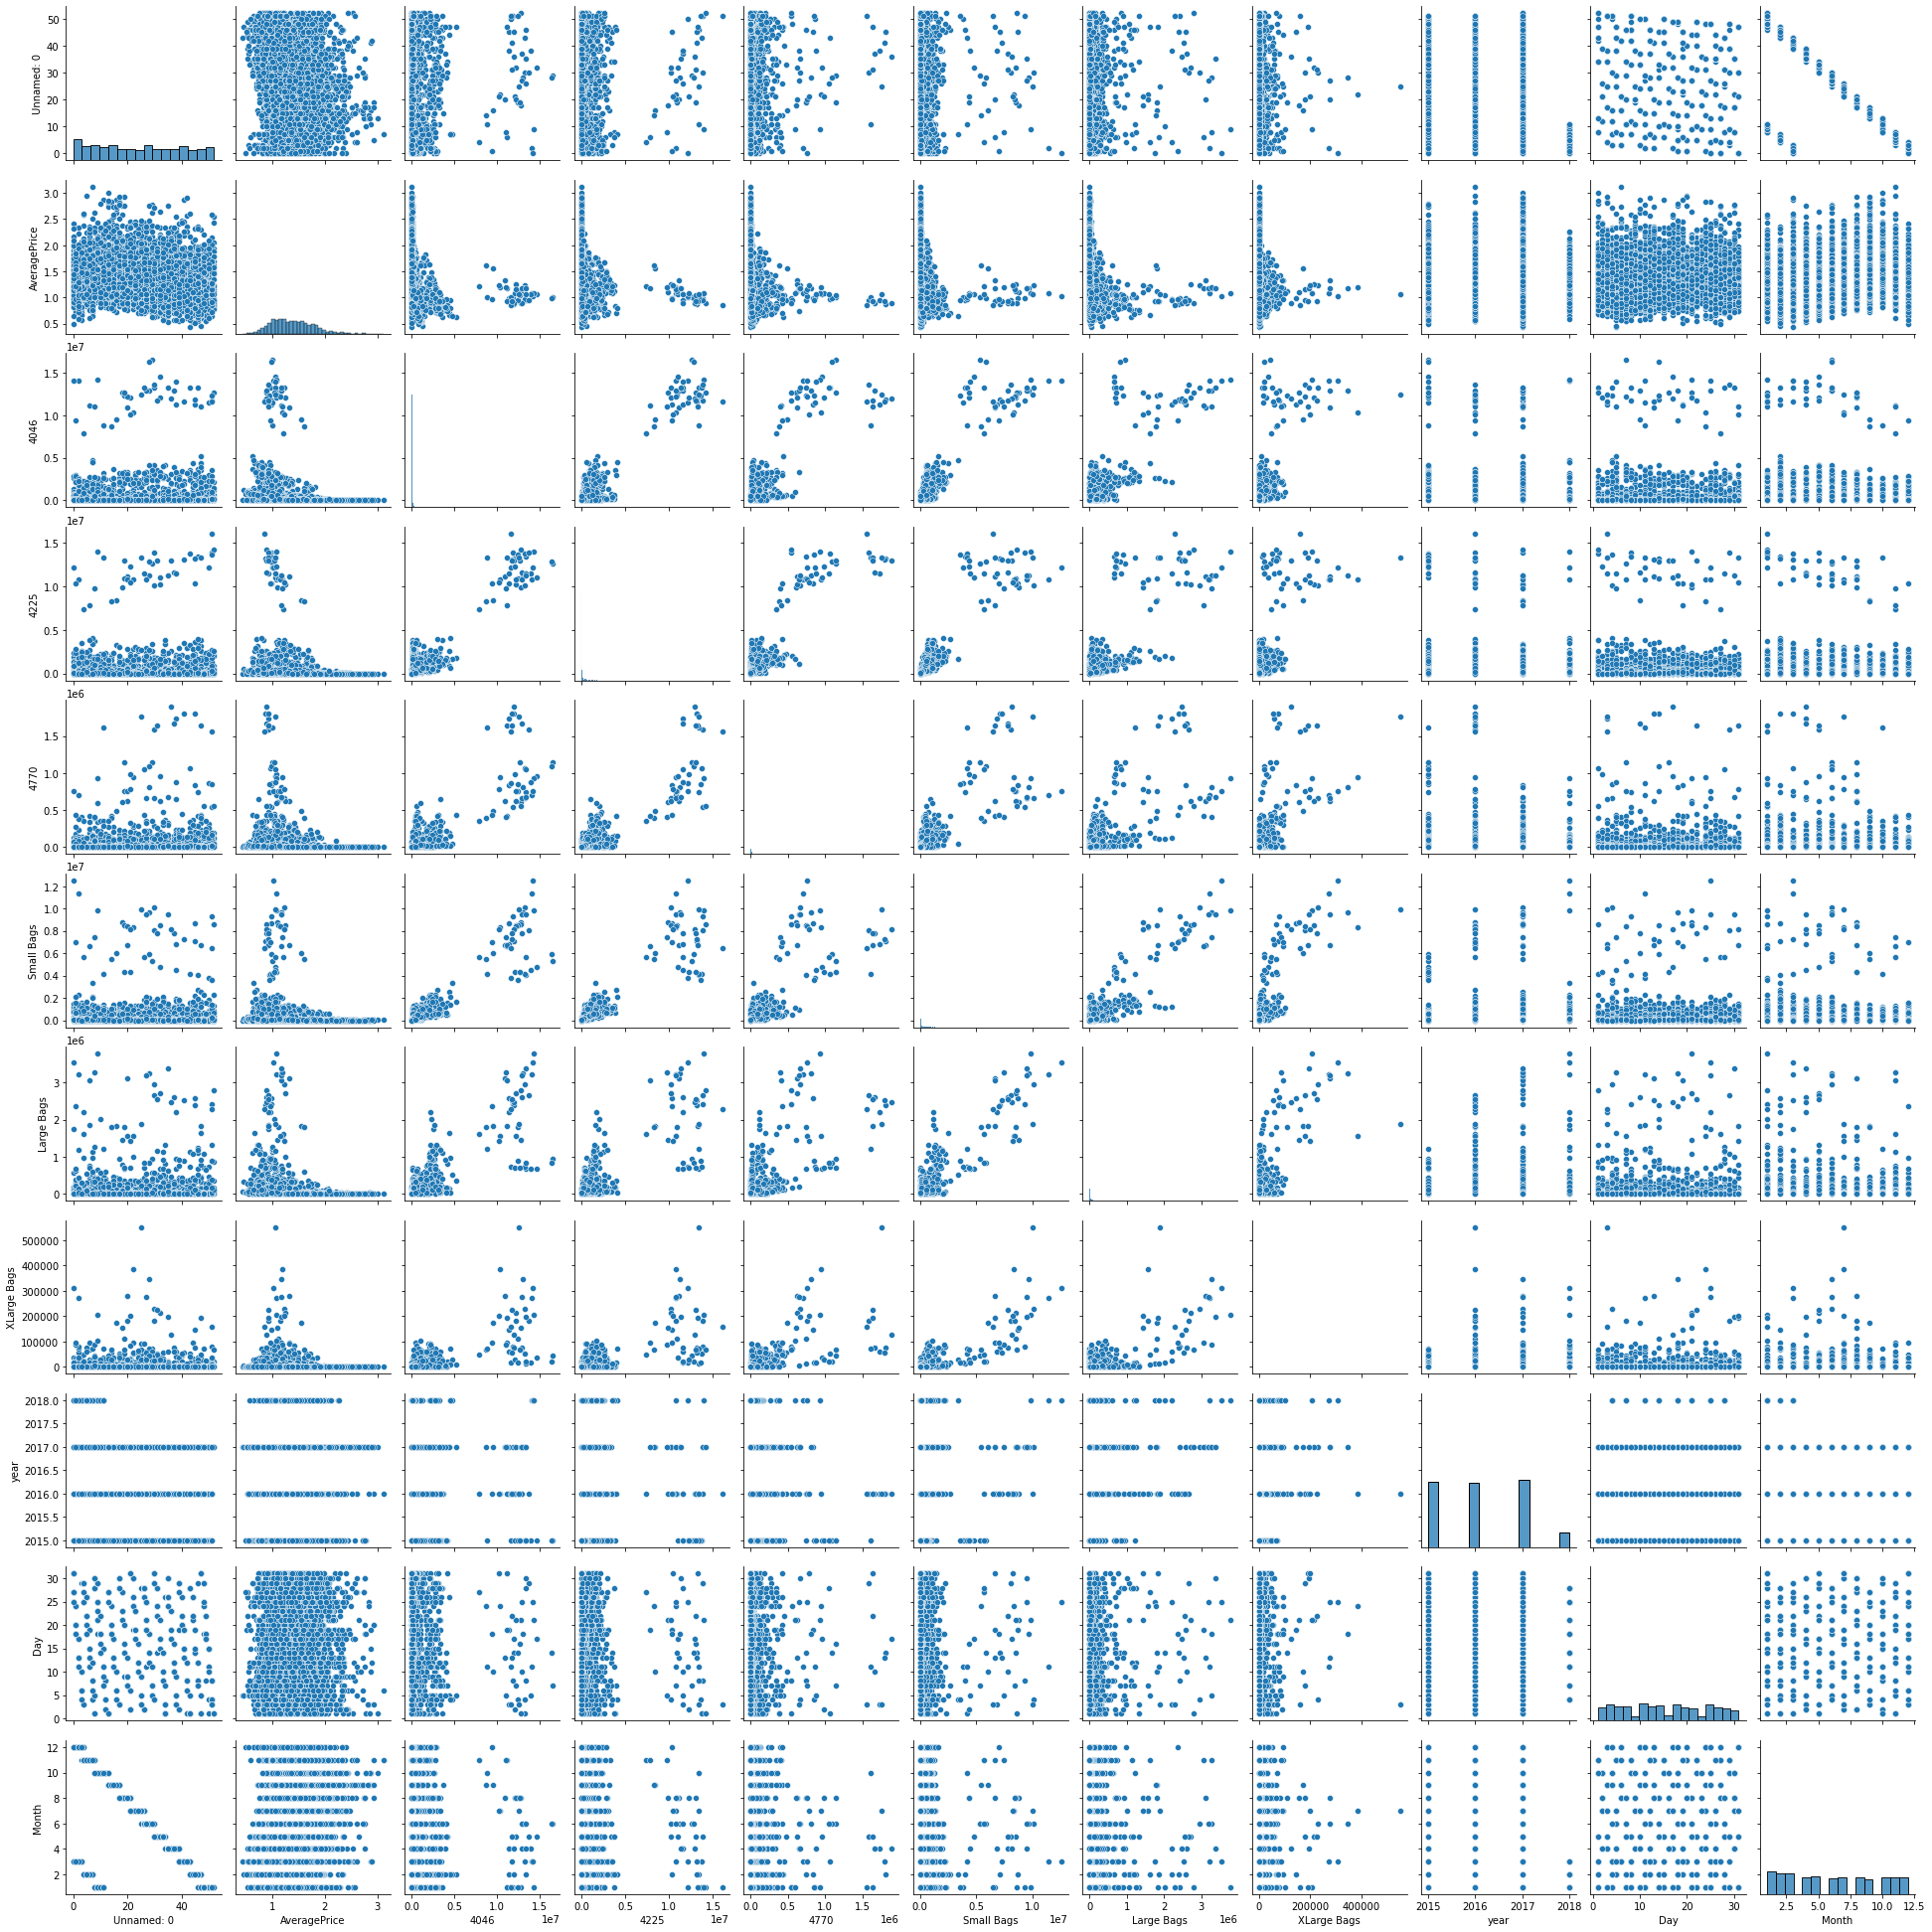

In [35]:
sns.pairplot(rows)

#### Checking  for  the Outliers  in the Dataset

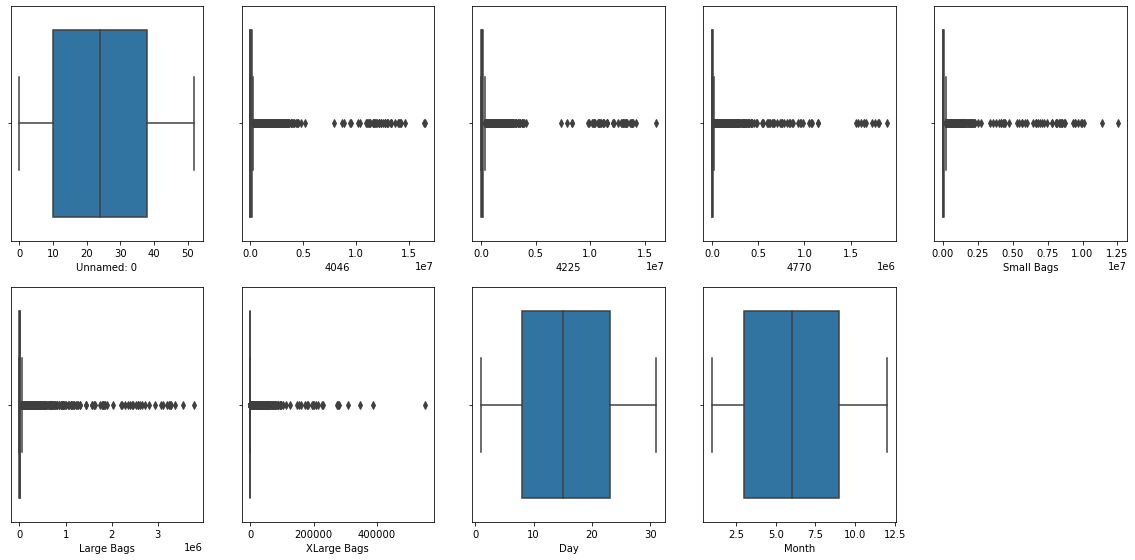

In [36]:
#### Finding outliers in the dataset
def check_outliers(data_f):
    plt.figure(figsize=(20,25),facecolor='white')
    plotnum = 1
    for feature in data_f.drop(columns=['year','type','region','AveragePrice'],axis=1):
        if plotnum <= 16:
            plt.subplot(5,5,plotnum)
            sns.boxplot(data_f[feature])
            plt.xlabel(feature)
        plotnum+=1
    plt.show()
check_outliers(rows)

- Each column here has the ouliers except Day and Month

#### Checking for skewness

In [37]:
rows.skew()

Unnamed: 0       0.109567
AveragePrice     0.586442
4046             7.974821
4225             8.392444
4770            10.086085
Small Bags       9.289358
Large Bags       8.916800
XLarge Bags     13.755375
year             0.206286
Day              0.049275
Month            0.107005
dtype: float64

#### Checking  for  the correlation

In [38]:
rows.corr()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
Unnamed: 0,1.000000,-0.143660,0.040872,0.039700,0.060048,0.014859,0.012538,-0.004326,-0.157951,-0.099328,-0.785798
AveragePrice,-0.143660,1.000000,-0.215263,-0.177169,-0.172867,-0.172915,-0.186033,-0.108056,0.100886,0.035728,0.158248
4046,0.040872,-0.215263,1.000000,0.927554,0.832193,0.924210,0.827394,0.701358,0.002492,-0.020246,-0.048704
4225,0.039700,-0.177169,0.927554,1.000000,0.885022,0.920810,0.802930,0.707817,-0.005728,-0.023186,-0.047863
4770,0.060048,-0.172867,0.832193,0.885022,1.000000,0.812092,0.705885,0.686812,-0.029043,-0.014313,-0.057353
Small Bags,0.014859,-0.172915,0.924210,0.920810,0.812092,1.000000,0.893880,0.824089,0.065108,-0.005029,-0.042668
Large Bags,0.012538,-0.186033,0.827394,0.802930,0.705885,0.893880,1.000000,0.718947,0.098926,-0.004768,-0.051959
XLarge Bags,-0.004326,-0.108056,0.701358,0.707817,0.686812,0.824089,0.718947,1.000000,0.076657,0.008830,-0.023199
year,-0.157951,0.100886,0.002492,-0.005728,-0.029043,0.065108,0.098926,0.076657,1.000000,-0.004627,-0.178294
Day,-0.099328,0.035728,-0.020246,-0.023186,-0.014313,-0.005029,-0.004768,0.008830,-0.004627,1.000000,0.026590


<AxesSubplot:>

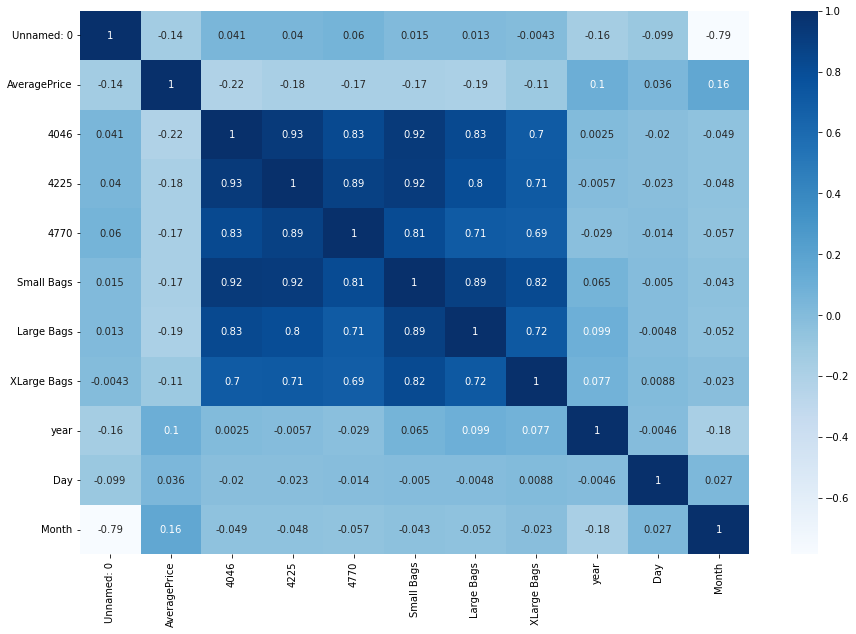

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(rows.corr(), annot=True, cmap='Blues')

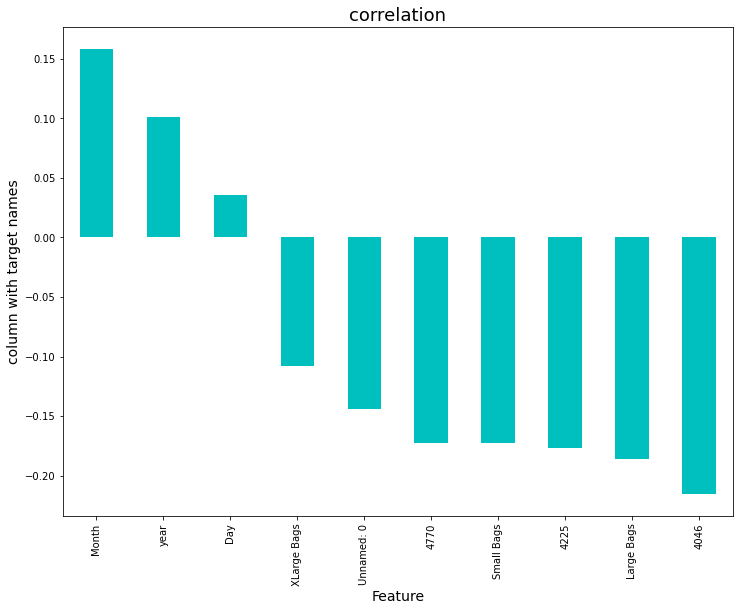

In [40]:
plt.figure(figsize=(12,9))
rows.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

so we  can see  that - X kargebags , 4225,4770,Large bags,Small bags, 4046 having   negative  or are  in inversly propotional in the  Dataset

In [41]:
rows.cov()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
Unnamed: 0,241.382054,-0.887749,8.368732e+05,7.657861e+05,1.080749e+05,1.810180e+05,4.904338e+04,-1.308335e+03,-2.302340,-13.538448,-43.151116
AveragePrice,-0.887749,0.158198,-1.128380e+05,-8.748826e+04,-7.964999e+03,-5.392756e+04,-1.862976e+04,-8.365639e+02,0.037647,0.124666,0.222468
4046,836873.224247,-112838.027845,1.736892e+12,1.517705e+12,1.270526e+11,9.550703e+11,2.745461e+11,1.799179e+10,3080.918499,-234087.798959,-226872.290993
4225,765786.106553,-87488.258861,1.517705e+12,1.541427e+12,1.272883e+11,8.964162e+11,2.509898e+11,1.710531e+10,-6671.483943,-252541.498435,-210034.735111
4770,108074.890890,-7964.998758,1.270526e+11,1.272883e+11,1.341979e+10,7.376598e+10,2.058844e+10,1.548670e+09,-3156.465767,-14546.277457,-23483.283027
Small Bags,181017.970881,-53927.555154,9.550703e+11,8.964162e+11,7.376598e+10,6.148315e+11,1.764713e+11,1.257768e+10,47896.987391,-34593.861758,-118252.010031
Large Bags,49043.382757,-18629.756567,2.745461e+11,2.509898e+11,2.058844e+10,1.764713e+11,6.339182e+10,3.523397e+09,23367.842938,-10532.259478,-46238.350254
XLarge Bags,-1308.334921,-836.563865,1.799179e+10,1.710531e+10,1.548670e+09,1.257768e+10,3.523397e+09,3.788755e+08,1399.891370,1507.847243,-1596.019885
year,-2.302340,0.037647,3.080918e+03,-6.671484e+03,-3.156466e+03,4.789699e+04,2.336784e+04,1.399891e+03,0.880212,-0.038084,-0.591234
Day,-13.538448,0.124666,-2.340878e+05,-2.525415e+05,-1.454628e+04,-3.459386e+04,-1.053226e+04,1.507847e+03,-0.038084,76.963882,0.824498


<AxesSubplot:>

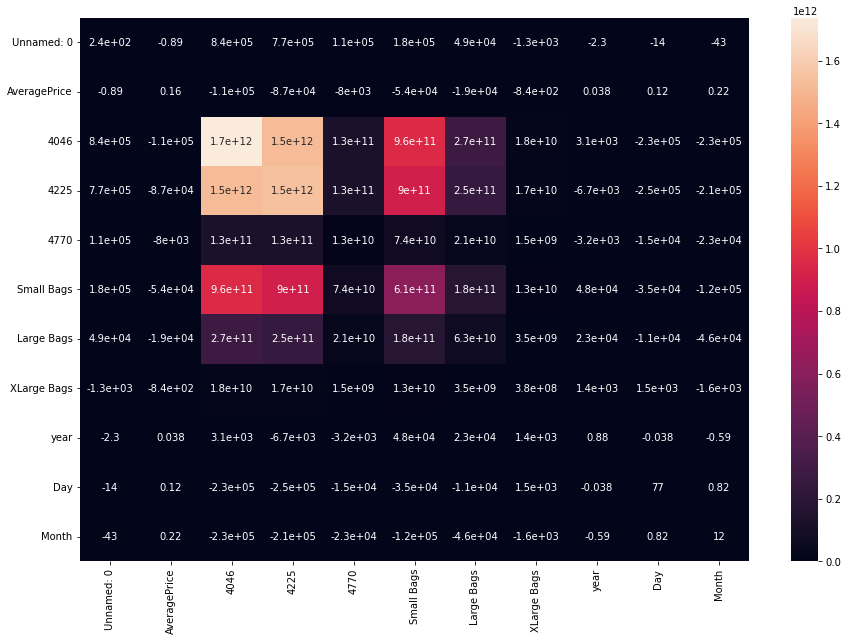

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(rows.cov(), annot=True)

### Data Cleaning and preprocessing

#### Encoding  the columns

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['type','region']
#
# Encode labels of multiple columns at once
#
rows[cols] = rows[cols].apply(LabelEncoder().fit_transform)

In [44]:
rows.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
5882,1,1.28,7430.89,72517.20,27.00,43236.49,4163.87,0.0,0,2017,5,24,12
15597,8,1.61,256.08,154.47,5.48,18300.82,6.60,0.0,1,2017,16,5,11
14302,29,1.10,36488.57,7670.66,417.29,59332.91,14010.93,0.0,1,2016,45,5,6
15336,12,1.73,5943.03,470.54,0.00,13391.02,3.33,0.0,1,2017,11,8,10
16276,51,2.15,6642.33,18205.31,338.50,17103.64,466.02,0.0,1,2017,28,8,1


#### Removing outliers using z-score method

In [45]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(rows))

# Creating new dataframe
new_avd=rows[(z<3).all(axis=1)]
new_avd

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
5882,1,1.28,7430.89,72517.20,27.00,43236.49,4163.87,0.00,0,2017,5,24,12
15597,8,1.61,256.08,154.47,5.48,18300.82,6.60,0.00,1,2017,16,5,11
14302,29,1.10,36488.57,7670.66,417.29,59332.91,14010.93,0.00,1,2016,45,5,6
15336,12,1.73,5943.03,470.54,0.00,13391.02,3.33,0.00,1,2017,11,8,10
16276,51,2.15,6642.33,18205.31,338.50,17103.64,466.02,0.00,1,2017,28,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,30,0.83,1214455.87,691108.91,113180.16,1038686.31,119446.72,27057.56,0,2016,22,29,5
3452,20,1.14,168010.47,183568.83,18624.73,151220.54,172079.23,1612.50,0,2016,12,7,8
11768,42,1.65,832.54,5.98,0.00,1843.33,0.00,0.00,1,2015,50,8,3
81,29,0.99,455565.92,22414.17,738.68,50954.84,21329.99,5.45,0,2015,1,7,6


In [46]:
rows.shape

(4562, 13)

In [47]:
new_avd.shape

(4424, 13)

#### Checking  the  Loss  from the Zscore method 

In [48]:
# Let's check the the data loss
data_loss = (4562-4440)/4562*100
print('The  Data_loss from Zscore  is :',data_loss)
print("This is acceptable  range ")

The  Data_loss from Zscore  is : 2.6742656729504604
This is acceptable  range 


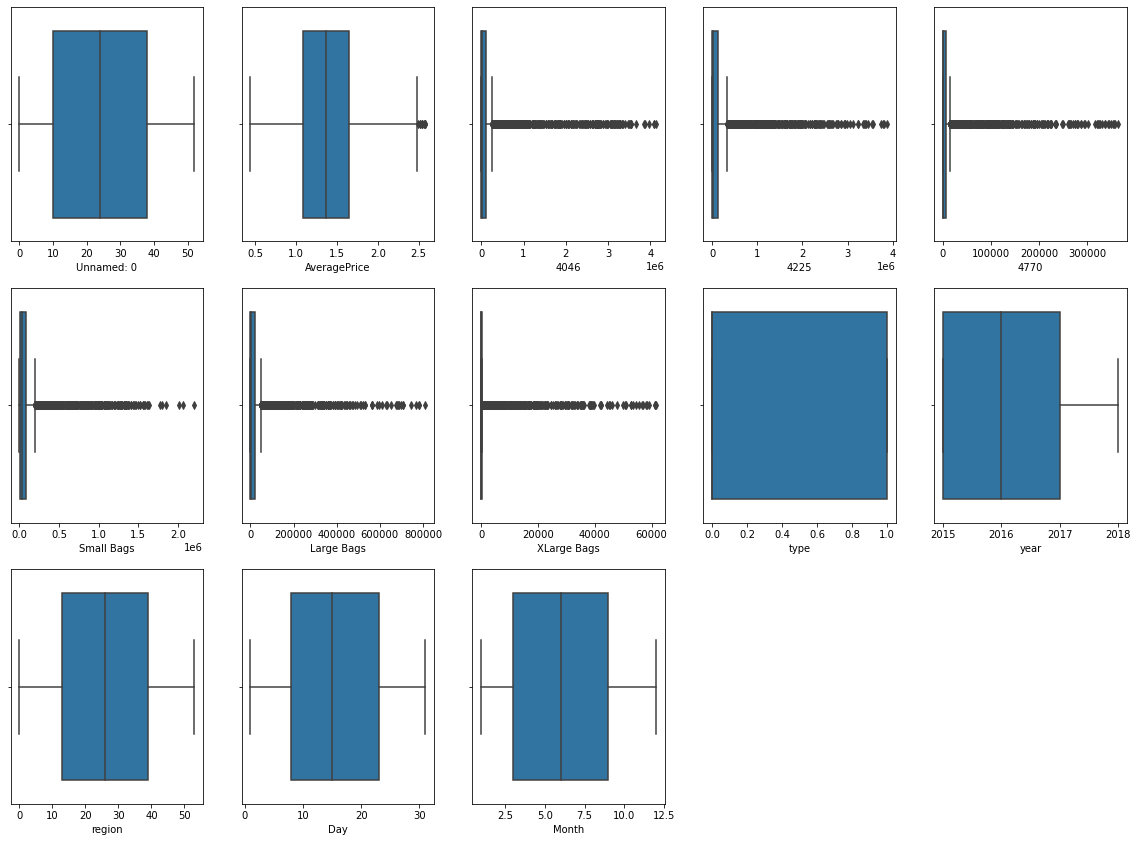

In [49]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1
for feature in new_avd:
    if plotnum <= 16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(new_avd[feature])
        plt.xlabel(feature)
    plotnum+=1
plt.show()

- Some outliers has been reduced from dataset

#### diving  the  dataset into x and y before  Transformation

In [50]:
x = new_avd.drop(['AveragePrice'], axis=1)
y =new_avd.iloc[:,0]

####  Removing the skewness using PowerTransformer

In [51]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson',)

In [52]:
x

array([[-1.78387804, -0.11421213,  0.43786665, ..., -1.45418387,
         0.95261231,  1.48723402],
       [-1.00931633, -1.08311451, -1.59668008, ..., -0.57336508,
        -1.22853148,  1.2697476 ],
       [ 0.4096103 ,  0.41318958, -0.43113495, ...,  1.17948009,
        -1.22853148,  0.04732868],
       ...,
       [ 1.08472297, -0.76530088, -2.28474091, ...,  1.44395913,
        -0.81311479, -0.86708781],
       [ 0.4096103 ,  1.35487204, -0.03696974, ..., -1.88440489,
        -0.94629288,  0.04732868],
       [ 1.22885547,  2.15901599,  1.87632031, ...,  1.17948009,
         0.02366324, -1.2308002 ]])

so now we  have  transformed  the  data using  the power
transformer technique 

In [53]:
x =pd.DataFrame(x)

In [54]:
x.skew()

0    -0.245276
1    -0.037295
2    -0.041220
3     0.013239
4    -0.022876
5    -0.107132
6     0.801748
7     0.018090
8     0.216711
9    -0.251030
10   -0.197840
11   -0.147995
dtype: float64

In [55]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.783878,-0.114212,0.437867,-0.399672,0.327320,0.209863,-0.696074,-0.990999,0.925438,-1.454184,0.952612,1.487234
1,-1.009316,-1.083115,-1.596680,-0.768520,-0.066750,-1.317027,-0.696074,1.009083,0.925438,-0.573365,-1.228531,1.269748
2,0.409610,0.413190,-0.431135,0.271962,0.481757,0.619020,-0.696074,1.009083,-0.141871,1.179480,-1.228531,0.047329
3,-0.681991,-0.184487,-1.303251,-1.245026,-0.201180,-1.415080,-0.696074,1.009083,0.925438,-0.943915,-0.813115,1.044831
4,1.506849,-0.149610,-0.116254,0.220574,-0.096249,-0.422242,-0.696074,1.009083,0.925438,0.210763,-0.813115,-1.648055
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.465046,1.758863,1.493632,1.623299,2.143966,1.462873,1.680164,-0.990999,-0.141871,-0.166904,1.424952,-0.235768
4420,-0.125801,0.966469,0.848485,1.193682,0.970108,1.623901,1.565430,-0.990999,-0.141871,-0.866813,-0.946293,0.568599
4421,1.084723,-0.765301,-2.284741,-1.245026,-0.957265,-1.647985,-0.696074,1.009083,-1.211060,1.443959,-0.813115,-0.867088
4422,0.409610,1.354872,-0.036970,0.411938,0.406821,0.771701,0.478154,-0.990999,-1.211060,-1.884405,-0.946293,0.047329


#### Once gain checking for skewness

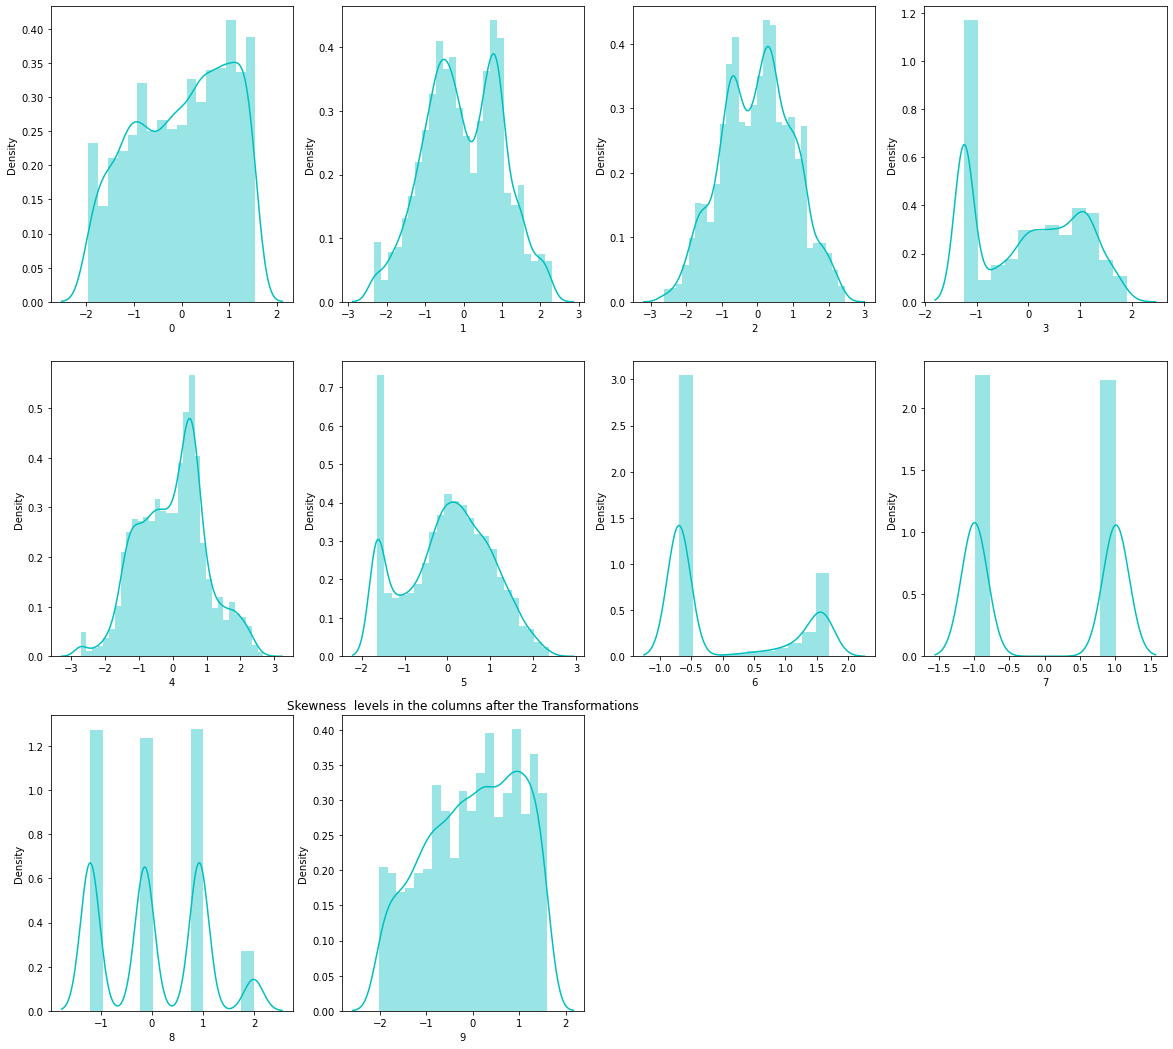

In [56]:

plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1
for i in x[[0,1,2,3,4,5,6,7,8,9,10]]:
    if plotnum <=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(x[i], color='c')
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.title('Skewness  levels in the columns after the Transformations')
plt.show()

so  now we can see  that  the data is  almost  normally  distributed  and the skewness is  being  removed  by  the  transformer

In [57]:
new_avd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 5882 to 2385
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4424 non-null   int64  
 1   AveragePrice  4424 non-null   float64
 2   4046          4424 non-null   float64
 3   4225          4424 non-null   float64
 4   4770          4424 non-null   float64
 5   Small Bags    4424 non-null   float64
 6   Large Bags    4424 non-null   float64
 7   XLarge Bags   4424 non-null   float64
 8   type          4424 non-null   int32  
 9   year          4424 non-null   int64  
 10  region        4424 non-null   int32  
 11  Day           4424 non-null   int64  
 12  Month         4424 non-null   int64  
dtypes: float64(7), int32(2), int64(4)
memory usage: 449.3 KB


#### Scaling the columns using  the Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

In [59]:
scaled_x

array([[-1.78387804, -0.11421213,  0.43786665, ..., -1.45418387,
         0.95261231,  1.48723402],
       [-1.00931633, -1.08311451, -1.59668008, ..., -0.57336508,
        -1.22853148,  1.2697476 ],
       [ 0.4096103 ,  0.41318958, -0.43113495, ...,  1.17948009,
        -1.22853148,  0.04732868],
       ...,
       [ 1.08472297, -0.76530088, -2.28474091, ...,  1.44395913,
        -0.81311479, -0.86708781],
       [ 0.4096103 ,  1.35487204, -0.03696974, ..., -1.88440489,
        -0.94629288,  0.04732868],
       [ 1.22885547,  2.15901599,  1.87632031, ...,  1.17948009,
         0.02366324, -1.2308002 ]])

#### Using Variation inflation factor for checking multicollinearity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(scaled_x):
    #Calculating VIF
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
    return vif
vif = calc_VIF(scaled_x)

In [61]:
vif

,Features,VIF
0,0,2.947718
1,1,3.744769
2,2,4.191770
3,3,3.967600
4,4,4.299442
5,5,1.882873
6,6,2.050990
7,7,3.487326
8,8,1.721451
9,9,1.077446


as  here  we can see  that  there  are  some high  Vif   values  of  the  columns like 0 and 1  but  still we  are  not  removing it  for  now as  it may be some important feature and  may affect  the  predictive  model

In [62]:
x= scaled_x

#### Feature Engineering

K best

Variance  threshold

In [63]:
from sklearn.feature_selection import VarianceThreshold
# we are  importing  the  sklearn's  feature  selection technique  here  to extract  some imp  feature   from  the  model
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(x)

VarianceThreshold()

In [64]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [65]:
x = pd.DataFrame(x)

In [66]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [67]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_thres.get_support()]]
print('One column is  to be  removed ---',len(cons_columns))

One column is  to be  removed --- 0


so according   to  the Variance Threshold  method  we   have  to remove  the  7th column

In [68]:
# K BEST
from sklearn.feature_selection import SelectKBest, f_classif

In [69]:
bestfeat = SelectKBest(score_func = f_classif, k =10)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [70]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

    Feature       Score
11       11  173.322301
10       10  107.658411
8         8    6.342392
6         6    2.364911
5         5    1.304284
4         4    1.225353
3         3    1.152757
1         1    1.035750
2         2    0.967082
7         7    0.894842


- selecting best features based on score
- Dropping the least scores from the datase

In [71]:
x_best = x.drop(columns=[8,9])

In [72]:
x_best_scaled = scalar.fit_transform(x_best)

In [73]:
x_best_scaled

array([[-1.78387804, -0.11421213,  0.43786665, ..., -0.99099892,
         0.95261231,  1.48723402],
       [-1.00931633, -1.08311451, -1.59668008, ...,  1.00908284,
        -1.22853148,  1.2697476 ],
       [ 0.4096103 ,  0.41318958, -0.43113495, ...,  1.00908284,
        -1.22853148,  0.04732868],
       ...,
       [ 1.08472297, -0.76530088, -2.28474091, ...,  1.00908284,
        -0.81311479, -0.86708781],
       [ 0.4096103 ,  1.35487204, -0.03696974, ..., -0.99099892,
        -0.94629288,  0.04732868],
       [ 1.22885547,  2.15901599,  1.87632031, ..., -0.99099892,
         0.02366324, -1.2308002 ]])

#### Model  devlopment for prediction

##### As the output data is continuous we need are going with regression models 

Importing all  the model and libs for model creation

In [77]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import joblib
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

#### Finding  the best  Random state for  the model

In [75]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 1.0 on random_state: 39


#### Training all  the Models in same  list with Def func call

With  K fold Cross validation

In [78]:
models= [RandomForestRegressor(n_estimators=450,random_state=39, max_depth=3,),XGBRegressor(),SVR(kernel='linear'),KNeighborsRegressor(),SGDRegressor(),GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,subsample=0.1, random_state=39)]
x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size=.33,random_state=39)

def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x_best_scaled,y,cv=6).mean()
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('_______________________________________________')
compare_models()

R2 score of the model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=39) = 98.9 %
mean squared error for model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=39) = 2.61680669043072
cross val score for model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=39) = 0.9876283055910222
_______________________________________________
R2 score of the model :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
      

as in the  above  model  biuilding  and  the  cross  validation of  the each  model  in the pipeline of  the lists  we can see  that the  cross val score from the Gradient boosting  regressor is  the highest &  the best among  all which is  around   to  99% 

### HyperParameter Tuning

In [83]:
parameters = {'n_estimators':[30,60,80,100,500],
                   'max_depth':[2,3,4],
                   'alpha':[0,0.1,0.5,0.9],
                   'subsample':[0.01,0.1,0.2,0.5,1],
                   'n_iter_no_change':[20,45,50,100],
                   'criterion':['mse','squared_error'],
                    'learning_rate':[0.1,0.01,0.001,1]
    }
grid_classifier = GridSearchCV(GradientBoostingRegressor(),parameters,cv=7,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 7 folds for each of 9600 candidates, totalling 67200 fits
The best parameters are {'alpha': 0.1, 'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'n_iter_no_change': 100, 'subsample': 1}
The best Score is 0.9999999777221369


In [84]:
Best_mod1 = GradientBoostingRegressor(n_estimators=500,criterion='mse',max_depth=3,learning_rate=0.1,n_iter_no_change=100, subsample=1, alpha=0.1)
Best_mod1.fit(x_train,y_train)
Gbpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,Gbpred)
print(acc*100)

99.99999974513142


#### The  accuracy score from the  Hypertuned  model  is  99.99%  which says  that it is  a very good  model for  prediction

#### saving the Model

In [85]:
import joblib
joblib.dump(Best_mod1,"Avacado_model.pkl")

['Avacado_model.pkl']

#### Loading the model

In [87]:
mod = joblib.load("Avacado_model.pkl")
print(mod.predict(x_test))

[48.99981094 17.99848699 21.99975752 ... 30.9984934  41.99923599
 20.00058493]


##### Prediction by  the model

In [88]:
a = np.array(y_test)
predicted = np.array(Best_mod1.predict(x_test))
df_ava = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_ava

,orginal,predicted
0,49,48.999811
1,18,17.998487
2,22,21.999758
3,19,18.999669
4,5,4.999672
...,...,...
1455,6,5.999934
1456,17,17.000548
1457,31,30.998493
1458,42,41.999236


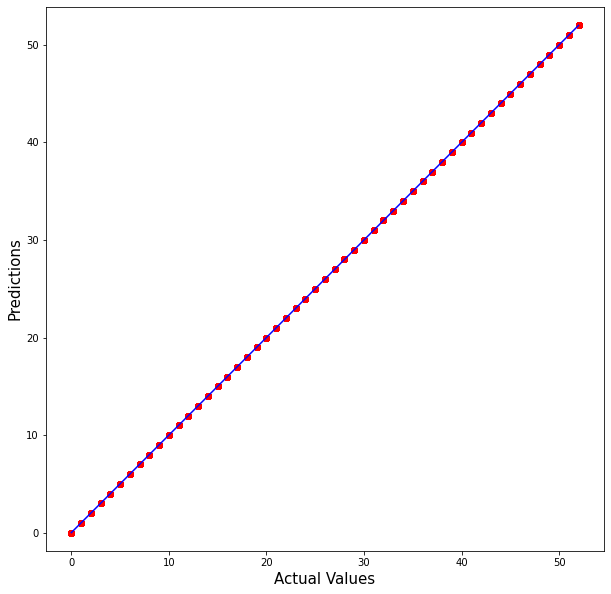

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Gbpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(Gbpred), max(y_test))
p2 = min(min(Gbpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Original vs predicted  graph')

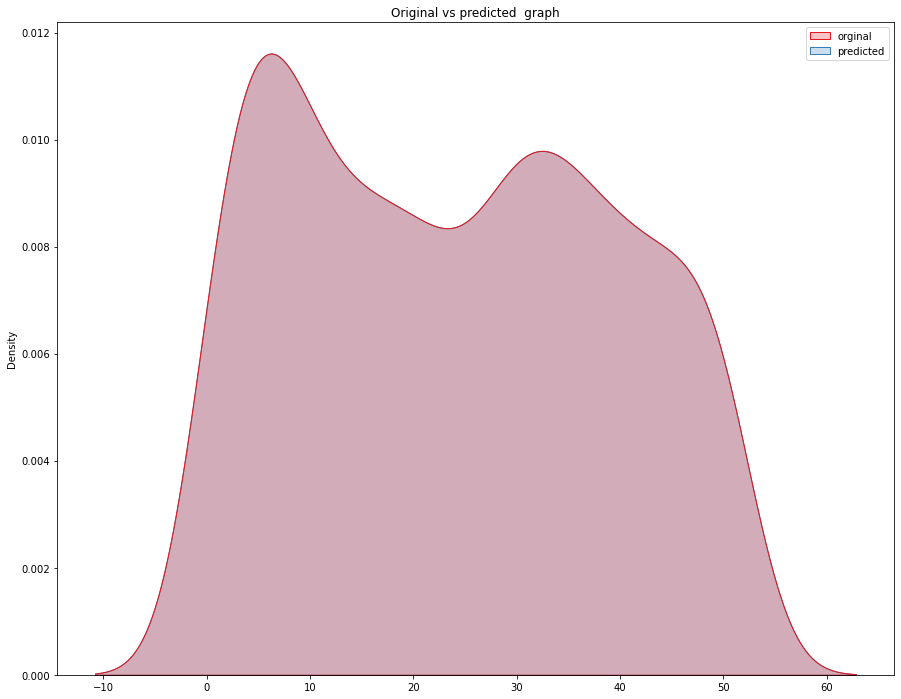

In [94]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=df_ava, palette='Set1',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

So  we  have  a  very good  model  

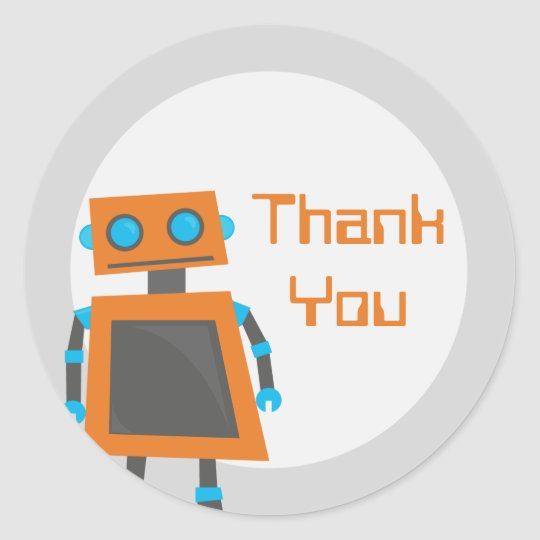

I  learnt  what  you taught  to me!!!!